In [1]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np

c:\Users\shivansh uppal\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


We need to perform LSTM on the dataset

In [208]:
data=pd.read_csv(r"C:\Users\shivansh uppal\Downloads\NDTV.NS (4).csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-16,92.500000,92.500000,90.500000,91.349998,91.349998,20762
1,2015-09-18,92.199997,93.000000,90.250000,90.949997,90.949997,66296
2,2015-09-21,90.300003,92.500000,90.050003,91.150002,91.150002,36083
3,2015-09-22,90.550003,92.300003,87.000000,87.900002,87.900002,62230
4,2015-09-23,88.000000,94.699997,82.800003,89.050003,89.050003,615823
...,...,...,...,...,...,...,...
1721,2022-09-09,444.600006,444.600006,444.600006,444.600006,444.600006,65468
1722,2022-09-12,422.399994,422.399994,422.399994,422.399994,422.399994,38416
1723,2022-09-13,402.000000,443.500000,402.000000,443.500000,443.500000,663872
1724,2022-09-14,432.899994,465.649994,431.000000,465.649994,465.649994,521382


In [209]:
#index as datetime in pandas
data.index=(pd.to_datetime(data['Date']))   # type: ignore
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-09-16,2015-09-16,92.500000,92.500000,90.500000,91.349998,91.349998,20762
2015-09-18,2015-09-18,92.199997,93.000000,90.250000,90.949997,90.949997,66296
2015-09-21,2015-09-21,90.300003,92.500000,90.050003,91.150002,91.150002,36083
2015-09-22,2015-09-22,90.550003,92.300003,87.000000,87.900002,87.900002,62230
2015-09-23,2015-09-23,88.000000,94.699997,82.800003,89.050003,89.050003,615823
...,...,...,...,...,...,...,...
2022-09-09,2022-09-09,444.600006,444.600006,444.600006,444.600006,444.600006,65468
2022-09-12,2022-09-12,422.399994,422.399994,422.399994,422.399994,422.399994,38416
2022-09-13,2022-09-13,402.000000,443.500000,402.000000,443.500000,443.500000,663872


In [210]:
#drop date column

data.drop(['Date'],axis=1,inplace=True)

In [211]:
data.sort_index(inplace=True)

In [212]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-09-16,92.500000,92.500000,90.500000,91.349998,91.349998,20762
2015-09-18,92.199997,93.000000,90.250000,90.949997,90.949997,66296
2015-09-21,90.300003,92.500000,90.050003,91.150002,91.150002,36083
2015-09-22,90.550003,92.300003,87.000000,87.900002,87.900002,62230
2015-09-23,88.000000,94.699997,82.800003,89.050003,89.050003,615823
...,...,...,...,...,...,...
2022-09-09,444.600006,444.600006,444.600006,444.600006,444.600006,65468
2022-09-12,422.399994,422.399994,422.399994,422.399994,422.399994,38416
2022-09-13,402.000000,443.500000,402.000000,443.500000,443.500000,663872


In [284]:
data.drop(['Adj Close'],axis=1,inplace=True)

In [403]:
y=data['Close'].values
X=data.drop(columns='Close')

In [404]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(X)
y=scaler.fit_transform(np.reshape(y,(-1,1)))

In [405]:
split_index=int(len(y)*0.8)

y_train,y_test=y[:split_index],y[split_index:]

In [406]:
X_train,X_test=X[:split_index],X[split_index:]

In [407]:
X_train,X_test=np.expand_dims(X_train,axis=2),np.expand_dims(X_test,axis=2)

In [408]:
#build the model

from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(None,X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, None, 32)          4352      
                                                                 
 dropout_48 (Dropout)        (None, None, 32)          0         
                                                                 
 dense_40 (Dense)            (None, None, 1)           33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [409]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [410]:
model.fit(X_train,y_train,epochs=40,batch_size=32)

Epoch 1/40
44/44 [==============================] - 23s 49ms/step - loss: 0.0025
Epoch 2/40
44/44 [==============================] - 2s 38ms/step - loss: 0.0014
Epoch 3/40
44/44 [==============================] - 2s 46ms/step - loss: 8.1269e-04
Epoch 4/40
44/44 [==============================] - 2s 43ms/step - loss: 5.3889e-04
Epoch 5/40
44/44 [==============================] - 2s 51ms/step - loss: 4.7632e-04
Epoch 6/40
44/44 [==============================] - 2s 46ms/step - loss: 4.1934e-04
Epoch 7/40
44/44 [==============================] - 2s 39ms/step - loss: 3.8043e-04
Epoch 8/40
44/44 [==============================] - 2s 42ms/step - loss: 3.4810e-04
Epoch 9/40
44/44 [==============================] - 2s 41ms/step - loss: 3.2109e-04
Epoch 10/40
44/44 [==============================] - 2s 45ms/step - loss: 3.0322e-04
Epoch 11/40
44/44 [==============================] - 1s 34ms/step - loss: 2.7973e-04
Epoch 12/40
44/44 [==============================] - 2s 35ms/step - loss: 2.6244e

In [411]:
#predict the model

#import the best model

from keras.models import load_model
y_pred=model.predict(X_test)

11/11 [==============================] - 3s 2ms/step


In [425]:
y_pred.shape

(346, 4)

In [414]:
y_pred=np.squeeze(y_pred)

In [415]:
y_pred=scaler.inverse_transform(y_pred)

In [424]:
y_test.shape

(346, 1)

In [416]:
#plot the graph

import matplotlib.pyplot as plt

In [417]:
y_test=scaler.inverse_transform(y_test)

In [426]:
y_pred[:,0]

array([ 54.17811 ,  54.878742,  54.68411 ,  53.905663,  60.487083,
        61.071613,  66.72507 ,  64.385056,  61.2275  ,  62.006977,
        61.578255,  63.21539 ,  63.020466,  61.656204,  65.08696 ,
        69.4172  ,  72.30569 ,  75.35171 ,  78.555405,  73.51612 ,
        74.53149 ,  75.312645,  68.67577 ,  66.022964,  63.137424,
        65.164955,  68.20755 ,  66.49103 ,  65.86696 ,  66.29599 ,
        65.63295 ,  67.42725 ,  66.8811  ,  68.20755 ,  67.778366,
        68.36362 ,  66.33501 ,  65.39895 ,  68.01247 ,  66.842094,
        66.41301 ,  66.8811  ,  65.98397 ,  69.2611  ,  69.02696 ,
        67.622314,  67.89542 ,  68.98794 ,  67.154175,  66.374016,
        66.100975,  66.022964,  70.23677 ,  71.60297 ,  70.43192 ,
        70.2758  ,  70.39289 ,  71.05646 ,  69.88551 ,  69.02696 ,
        70.43192 ,  68.98794 ,  69.33915 ,  68.7148  ,  67.93443 ,
        68.87088 ,  69.690384,  70.62708 ,  69.45623 ,  67.89542 ,
        69.84649 ,  77.65666 ,  72.18857 ,  71.407776,  72.227

In [423]:
y_test

array([[ 54.900002],
       [ 55.049999],
       [ 54.25    ],
       [ 59.650002],
       [ 63.      ],
       [ 69.300003],
       [ 66.699997],
       [ 63.950001],
       [ 62.849998],
       [ 63.349998],
       [ 63.799999],
       [ 64.949997],
       [ 64.5     ],
       [ 67.699997],
       [ 71.050003],
       [ 74.449997],
       [ 78.150002],
       [ 82.050003],
       [ 79.800003],
       [ 79.800003],
       [ 81.400002],
       [ 77.349998],
       [ 73.5     ],
       [ 69.849998],
       [ 67.099998],
       [ 70.400002],
       [ 70.699997],
       [ 69.25    ],
       [ 69.349998],
       [ 69.449997],
       [ 71.25    ],
       [ 70.400002],
       [ 71.25    ],
       [ 71.550003],
       [ 72.650002],
       [ 70.349998],
       [ 69.400002],
       [ 71.349998],
       [ 70.949997],
       [ 70.599998],
       [ 70.699997],
       [ 70.050003],
       [ 73.550003],
       [ 73.699997],
       [ 71.400002],
       [ 72.550003],
       [ 73.300003],
       [ 71.5

In [427]:
rmse=np.sqrt(np.mean(y_pred[:,0]-y_test)**2)
print(rmse)

21.157616333155282


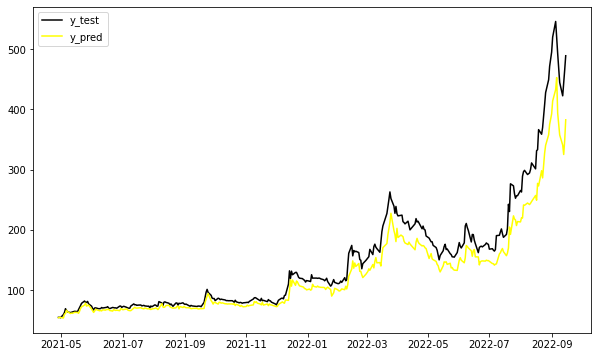

In [428]:
#plot y_test and y_pred with respect to time of test data(X_test)

dates=data.index[split_index:]

plt.figure(figsize=(10,6))

#line plot for y_test and y_pred

plt.plot(dates,y_test,label='y_test',color='black')
plt.plot(dates,y_pred[:,0],label='y_pred',color='yellow')

plt.legend()

In [429]:
X_train.shape

(1380, 4, 1)